# Summary
1. [Test PyTorch GPU](#1.-Test-PyTorch-GPU)
2. [Test fastai](#2.-Test-fastai)
3. [List package versions](#Test)

## 1. Test PyTorch GPU

In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
!nvidia-smi

Tue Jun 23 18:45:43 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64       Driver Version: 440.64       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Quadro M1200        Off  | 00000000:01:00.0  On |                  N/A |
| N/A   42C    P0    N/A /  N/A |    593MiB /  4043MiB |      3%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [4]:
a = torch.zeros(100,100, device=torch.device('cuda'))
a.shape, a.device

(torch.Size([100, 100]), device(type='cuda', index=0))

## 2. Test fastai

In [5]:
from fastai2.vision.all import *

In [6]:
path = untar_data(URLs.CAMVID_TINY)
codes = np.loadtxt(path/'codes.txt', dtype=str)
fnames = get_image_files(path/"images")
def label_func(fn): return path/"labels"/f"{fn.stem}_P{fn.suffix}"

dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames=fnames, label_func=label_func, codes=codes
)

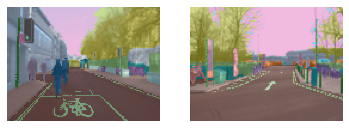

In [7]:
dls.show_batch(max_n=2)

In [8]:
learn = unet_learner(dls, resnet18, pretrained=False)
learn.fine_tune(1)

epoch,train_loss,valid_loss,time
0,2.914807,3.109207,00:10


epoch,train_loss,valid_loss,time
0,2.169933,2.790045,00:04


In [9]:
!rm -r /home/default/.fastai/data/camvid_tiny

## 3. List package versions

In [10]:
from platform    import python_version
from matplotlib  import __version__ as matplotlib_v
from notebook    import __version__ as note_v
from numpy       import __version__ as numpy_v
from pandas      import __version__ as pandas_v
from PIL         import __version__ as pillow_v
from pip         import __version__ as pip_v
from sklearn     import __version__ as scikit_learn_v
from scipy       import __version__ as scipy_v
from spacy       import __version__ as spacy_v
from torch       import __version__ as torch_v
from torchvision import __version__ as torchvision_v

from subprocess import check_output
fastai2_info    = check_output('git -C ~/fastai2  log -n 1 --pretty=format:"%H %ci"',  shell=True).decode('utf-8').split(' ', 1)
fastcore_info   = check_output('git -C ~/fastcore  log -n 1 --pretty=format:"%H %ci"', shell=True).decode('utf-8').split(' ', 1)
nbdev_info      = check_output('git -C ~/nbdev  log -n 1 --pretty=format:"%H %ci"',    shell=True).decode('utf-8').split(' ', 1)

In [11]:
package_versions = {
    'python': {
        'matplotlib'  : matplotlib_v,
        'notebook'    : note_v,
        'numpy'       : numpy_v,
        'pandas'      : pandas_v,
        'pillow'      : pillow_v,
        'pip'         : pip_v,
        'python'      : python_version(),
        'scikit-learn': scikit_learn_v,
        'scipy'       : scipy_v,
        'spacy'       : spacy_v,
    },
    'pytorch': {
        'pytorch'    : torch_v,
        'torchvision': torchvision_v,
    },
    'fastai': {
        'fastai2' : fastai2_info,
        'fastcore': fastcore_info,
        'nbdev'   : nbdev_info,
    },
}

In [12]:
for type, packages in package_versions.items():
    if type in ('python', 'pytorch'):
        print(f'{type}:')
        for i,k in packages.items():
            print(f'    {i}: {k}')
    if type in ('fastai'):
        print(f'{type}:')
        for i,k in packages.items():
            print(f'    {i}:')
            print(f'\tHash = {k[0]}')
            print(f'\tTime = {k[1]}')

python:
    matplotlib: 3.2.2
    notebook: 6.0.3
    numpy: 1.18.5
    pandas: 1.0.5
    pillow: 7.1.2
    pip: 20.1.1
    python: 3.8.3
    scikit-learn: 0.23.1
    scipy: 1.5.0
    spacy: 2.3.0
pytorch:
    pytorch: 1.5.1
    torchvision: 0.6.0a0+35d732a
fastai:
    fastai2:
	Hash = bf455de9bc37c76f7f92b3c43227ef9d4779b614
	Time = 2020-06-17 20:23:42 -0400
    fastcore:
	Hash = 4a2d5ea702d0dc4a6c34c4acefafd9b494d9e222
	Time = 2020-05-20 05:51:34 -0700
    nbdev:
	Hash = 465597eedfb52ad5cd7cd6c378b8da6c851b4796
	Time = 2020-06-22 12:47:11 -0400
